In [48]:
import math
import random
import gc
import sys
import threading
from io import StringIO
from time import time
from tqdm import tqdm

def make_sat_graph(clauses):
    n = len(clauses)
    def var_index(var):
        if var < 0: return n - var
        else: return var
    res = ''
    for clause in clauses:
        res += '%i %i\n' % (var_index(-clause[0]), var_index(clause[1]))
        res += '%i %i\n' % (var_index(-clause[1]), var_index(clause[0]))
    return res


################################################################################
#######      Kosaraju's SSC algorithm implementation from part 1          ######
################################################################################

def readDirectedGraph(str):
    f = StringIO(str)

    adjlist = []
    adjlist_reversed = []

    line = f.readline()
    while line != '':
        num1, num2 = line.split()
        v_from = int(num1)
        v_to = int(num2)
        max_v = max(v_from, v_to)

        while len(adjlist) < max_v:
            adjlist.append([])
        while len(adjlist_reversed) < max_v:
            adjlist_reversed.append([])

        adjlist[v_from-1].append(v_to-1)
        adjlist_reversed[v_to-1].append(v_from-1)

        line = f.readline()

    return adjlist, adjlist_reversed


t = 0
s = None
n = 0
explored = None
leader = None
current_ssc = None
contradictory_ssc = None
sorted_by_finish_time = None

def DFS_Loop_1(graph_rev, n):

    global t, explored, sorted_by_finish_time

    t = 0
    explored = [False]*n
    sorted_by_finish_time = [None]*n

    for i in reversed(range(n)):
        if not explored[i]:
            DFS_1(graph_rev, i)


def DFS_1(graph_rev, i):

    global t, explored

    explored[i] = True

    for v in graph_rev[i]:
        if not explored[v]:
            DFS_1(graph_rev, v)

    sorted_by_finish_time[t] = i
    t += 1


def DFS_Loop_2(graph):

    global current_ssc, explored, contradictory_ssc, sorted_by_finish_time

    explored = [False]*len(graph)

    for i in reversed(range(len(graph))):
        if not explored[sorted_by_finish_time[i]]:
            scc_size = 0
            # Here we collect all the members
            # of the next SCC using DFS.
            current_ssc = set()
            contradictory_ssc = False
            DFS_2(graph, sorted_by_finish_time[i])
            if contradictory_ssc: break

    return contradictory_ssc


def DFS_2(graph, i):

    global explored, current_ssc, contradictory_ssc

    explored[i] = True
    current_ssc.add(i)

    # Check for unsatisfabilty indicator
    if i < n:
        if (i+n) in current_ssc:
            contradictory_ssc = True
    elif (i-n) in current_ssc:
        contradictory_ssc = True

    for v in graph[i]:
        if not explored[v]:
            DFS_2(graph, v)


def kosaraju_contradictory_ssc(graph, graph_rev):

    DFS_Loop_1(graph_rev, len(graph))
    contradictory_ssc = DFS_Loop_2(graph)

    return contradictory_ssc

def dfs(formula):
    sat_graph = make_sat_graph(formula)
    graph, graph_rev = readDirectedGraph(sat_graph)
    start = time()
    contradictory_ssc = kosaraju_contradictory_ssc(graph, graph_rev)
    res = 'unsatisfiable' if contradictory_ssc else 'satisfiable'
    time_taken = time() - start

    return time_taken

In [64]:
import random
import math

def random_solve(file, inputnumber):

    # Reading inputs from the input file and storing clauses in a list
    file = open(file, "r")
    noOfClauses = int( file.readline() )

    # List to store clauses
    clauses = []
    for i in range(inputnumber):
#         print(noOfClauses)
        clauseLiteralsInfo = file.readline().split()
        clause = Clause( firstLiteral = int(clauseLiteralsInfo[0]), secondLiteral = int(clauseLiteralsInfo[1]))
        clauses.append(clause)
    start = time()

    # Calling papadimitriou's algorithm
    papadimitriou(clauses, noOfClauses)
    return time() - start

def papadimitriou(clauses, noOfClauses):
    """Funtion to compute where or not a instance satisfies the 2-SAT property.
       Inputs are the clauses and number of clauses."""
    # List to store the values of the literals initialized above
    answers = []
    answers.append( "NaN" )
    for x in range(1, noOfClauses + 1):
        x = random.random()
        if x > 0.5:
            answers.append(True)
        else:
            answers.append(False)

    # Algorithm to run 2 * n^2 * logn times (loops)
    twoNSquared = 2 * (noOfClauses ** 2)

    # Flag to keep track if the input satisfies 2-SAT propety or not
    isSatisfying = False

    # Running for loop of algorithm
    for k in range( int( math.log(noOfClauses, 2) ) ):

#         print("ON LOOP NUMBER :" + str(k))

        for j in range(twoNSquared):

            # Flag to keep track if all the clauses are satisfied or not
            # Helps in breaking early
            areAllClausesSatisfied = True

            # Variable to keep track of number of clauses satisfied till now
            # (of the clauses scanned)
            noOfSatisfyingClauses = 0

            # Running loop for every clause
            for clause in clauses:

                # If clause is not satisfying itself individually
                if clause.isSatisfyingCriteria(answers) == False:
                    areAllClausesSatisfied = False

                    # Randomly choosing a literal and negating its value
                    randomlyChosenLiteral = random.choices([clause.firstLiteral,clause.secondLiteral])[0]
                    answers[ abs(randomlyChosenLiteral) ] = not( answers[ abs(randomlyChosenLiteral) ] )

                    break

                # Else if the clause is satisfying itself individually
                else:
                    noOfSatisfyingClauses += 1

#             print("The number of clauses satisfying criteria till now (of the ones which have been checked in a linear pass) is :" + str(noOfSatisfyingClauses) )

            # Breaking early if all the clauses are satisfied
            if areAllClausesSatisfied == True:
                isSatisfying = True
                break

        # Printing answers, values of the literals if 2-SAT property is satisfied by clauses
#         if isSatisfying == True:
#             # Printing results
# #             print("The answers of the literals respectively are as follows :- \n\n")
# #             for i in range(1, len(answers),1):
# #                 print("Literal " + str(i) + " : " + str(answers[i]) )
# #             print("The instance is satisfiable")
#             break

    # Printing not satisfiable if none of the iterations are able to find any solution
#     if isSatisfying == False:
#         print("The instance is not satisfiable")

class Clause:

    def __init__(self, firstLiteral, secondLiteral):
        """Function to initialize a new clause."""

        self.firstLiteral = firstLiteral
        self.secondLiteral = secondLiteral

    def __str__(self):
        """Function to print the clause in the required way."""

        return str(self.firstLiteral) + " OR " + str(self.secondLiteral)

    def isSatisfyingCriteria(self, answers):
        """Function to check whether the clause is satisfied or not."""

        # Negative value means negation
        # Positive value means no negation

        if self.firstLiteral < 0:
            boolean1 = not( answers[ abs(self.firstLiteral) ] )
        else:
            boolean1 = answers[ self.firstLiteral ]

        if self.secondLiteral < 0:
            boolean2 = not( answers[ abs(self.secondLiteral) ] )
        else:
            boolean2 = answers[ self.secondLiteral ]

        # Returning OR result of both the literals
        return boolean1 or boolean2

In [50]:
# parse formula

f = open('2sat%i.txt' % 1)
n = int(f.readline())
formula = [[int(x) for x in line.split()] for line in f]

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

length_size_array = []

for size in tqdm(np.linspace(0,20000,11)):
#     print(int(size))
    size = int(size)
#     length_size_array.append([len(formula), solve2(formula), dfs(formula)])
    length_size_array.append([size, dfs(formula[0:size]), random_solve('2sat%i.txt' % 1,size)])

length_size_array = np.array(length_size_array)






  0%|          | 0/11 [00:00<?, ?it/s]




 18%|█▊        | 2/11 [00:00<00:02,  3.80it/s]




 27%|██▋       | 3/11 [00:01<00:04,  1.63it/s]




 36%|███▋      | 4/11 [00:04<00:08,  1.25s/it]




 45%|████▌     | 5/11 [00:09<00:13,  2.22s/it]




 55%|█████▍    | 6/11 [00:16<00:18,  3.71s/it]




 64%|██████▎   | 7/11 [00:27<00:23,  5.83s/it]




 73%|███████▎  | 8/11 [00:42<00:25,  8.55s/it]




 82%|████████▏ | 9/11 [01:02<00:24, 12.07s/it]




 91%|█████████ | 10/11 [01:27<00:16, 16.07s/it]




100%|██████████| 11/11 [01:59<00:00, 10.87s/it]


In [67]:
np.set_printoptions(suppress=True)
print(length_size_array)

[[    0.             0.00167608     0.01924109]
 [ 2000.             0.1089201      0.26849031]
 [ 4000.             0.11624503     1.10772705]
 [ 6000.             0.12027812     2.42524076]
 [ 8000.             0.12885094     4.16185403]
 [10000.             0.13780189     6.82192087]
 [12000.             0.14001989    10.41960502]
 [14000.             0.1465683     14.49688697]
 [16000.             0.15350509    19.85130692]
 [18000.             0.17373586    24.909729  ]
 [20000.             0.15717244    31.409657  ]]


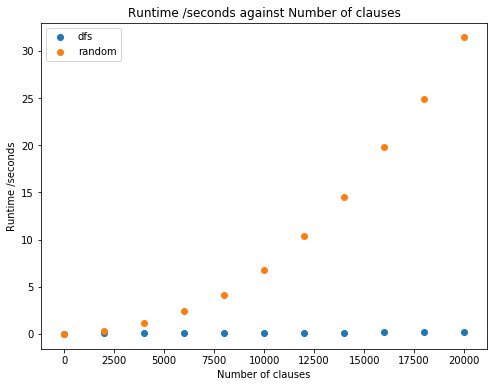

In [69]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(length_size_array[:, 0], length_size_array[:, 1], label = "dfs")
ax.scatter(length_size_array[:, 0], length_size_array[:, 2], label = "random")
plt.title("Runtime /seconds against Number of clauses")
plt.xlabel("Number of clauses")
plt.ylabel("Runtime /seconds")
plt.legend(loc=0)
plt.show()